In [1]:
library(tidyverse)
library(data.table)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [3]:
manny_sumstats <- '/oak/stanford/groups/mrivas/users/mrivas/scratch/biomarker/paper/array/w_british/ukb24983_v2.LDL_direct_adjstatins.genotyped.glm.linear'


In [2]:
new_sumstats <- '/oak/stanford/groups/mrivas/ukbb24983/cal/gwas/extras/adjusted_biomarkers/white_british/ukb24983_v2_hg19.INI20030780.genotyped.PHENO1.glm.linear.gz'



In [13]:
manny <- fread(
    cmd=paste0('cat ', manny_sumstats, '| sed -e "s/^#//g"'), sep='\t', data.table=F
)

In [14]:
new <- fread(
    cmd=paste0('zcat ', new_sumstats, '| sed -e "s/^#//g"'), sep='\t', data.table=F
)

In [20]:
manny_IDs <- manny %>% filter(as.numeric(P) < 1e-8) %>% select(ID) %>% pull()
new_IDs <- new %>% filter(as.numeric(P) < 1e-8) %>% select(ID) %>% pull()


In [22]:
IDs <- c(new_IDs, manny_IDs) %>% unique()

In [24]:
manny_IDs %>% length() %>% print()
new_IDs %>% length() %>% print()
IDs %>% length() %>% print()

[1] 3543
[1] 3543
[1] 3543


In [26]:
joined <- manny %>% filter(ID %in% IDs) %>%
select(ID, BETA) %>%
mutate(BETA = as.numeric(BETA)) %>%
rename(BETA_Manny = BETA) %>%
inner_join(
    new %>% filter(ID %in% IDs) %>%
    select(ID, BETA) %>%
    mutate(BETA = as.numeric(BETA)) %>%
    rename(BETA_new = BETA),
    by='ID'
) 

In [28]:
joined %>% filter(BETA_Manny != BETA_new) %>% dim()

[1] 0 3

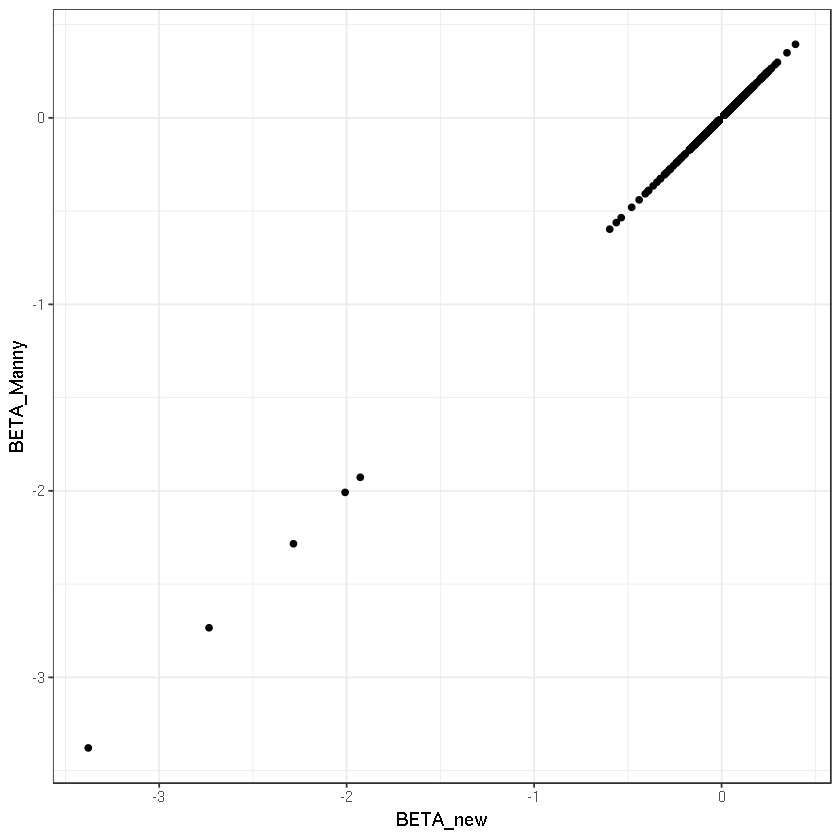

In [29]:
joined %>% 
ggplot(aes(x=BETA_new, y=BETA_Manny)) + 
geom_point() + theme_bw() + 
scale_color_brewer(palette="Dark2")

In [2]:
getwd()

[1] "/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas"